# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Bật tính năng để tắt các cảnh báo đi
import warnings
warnings.filterwarnings('ignore')

Data was stored here https://drive.google.com/file/d/1BKplKmmwrA3N1K3i3q613W6Iyc9eUbrn/view?usp=sharing

# Read data

| column  | description   | 
|---|---|
|Survival   |0 = No, 1 = Yes   | 
|Pclass| 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd|
|sSex| 	Sex 	|
|Age| 	Age in years | 	
|Sibsp| 	# of siblings / spouses aboard the Titanic | 	
|Parch| 	# of parents / children aboard the Titanic |	
|Ticket| 	Ticket number| 	
|Fare| 	Passenger fare |	
|Cabin| 	Cabin number |	
|Embarked| 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton|

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Vizualization

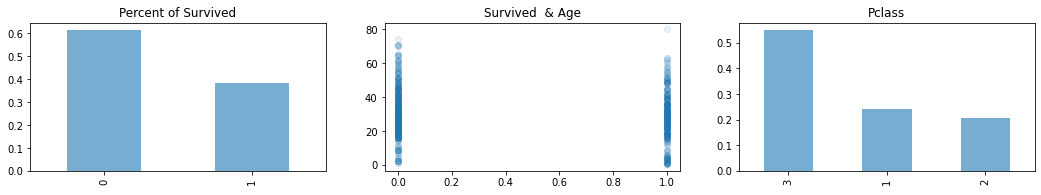

In [5]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Percent of Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=.1)
plt.title("Survived  & Age")

plt.subplot2grid((2,3), (0,2))
df.Pclass.value_counts(normalize= True).plot(kind = "bar", alpha=.6)
plt.title("Pclass")

plt.show()

=> H1: tỉ lệ sống sót chiểm khoảng 40% . 

   H2: Dựa vào mật độ phân bố, có thể nói rằng: số người già chết đi thay thế cho phần lớn trẻ con . 
       Độ tuổi sống sot nhiều nhất khoảng [17, 40]
   
   H3: Vé ghế 3 được mua nhiều nhất

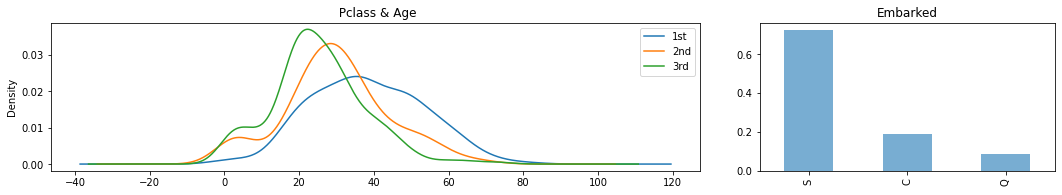

In [6]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0), colspan=2)
for i in [1,2,3]:
    df.Age[df.Pclass == i].plot(kind = "kde")
plt.title(" Pclass & Age")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((2,3),(0,2))
df.Embarked.value_counts(normalize=True).plot(kind = "bar", alpha = .6)
plt.title("Embarked")

plt.show()

=> H1: Ta thấy hàng ghế đá số đuược ngồi bởi người trẻ khoảng [19, 23], hàng ghế 1 đa số  là người trung niên khoảng [35,40]

   H2: Đa số mọi người xuất phát từ cảng Southampton

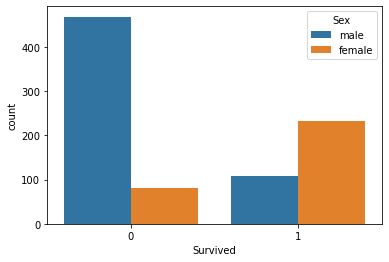

In [7]:
sns.countplot(df.Survived, hue= "Sex", data=df);

=> Tỉ lệ sống sót của nam giới thấp hơn nữ giới

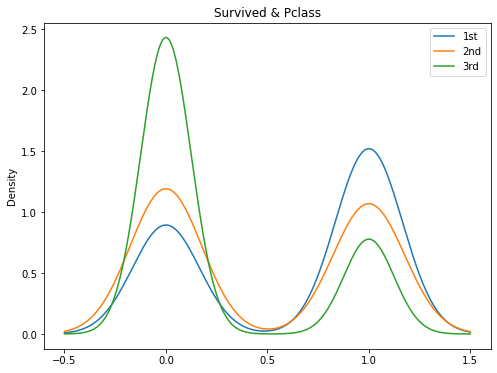

In [8]:
#sns.relplot(x="Survived",y='Pclass',kind='line',data=df)
plt.figure(figsize=(8,6))
for i in [1,2,3]:
    df.Survived[df.Pclass == i].plot(kind = "kde")
plt.title("Survived & Pclass")  
plt.legend(("1st", "2nd", "3rd"))
plt.xticks([-0.5, 0, 0.5, 1, 1.5])
plt.show()


=> Tỉ lệ sống sót của người ngồi hàng ghế 1 cao nhất và Tỉ lệ sống sót của người ngồi hàng ghế 3 là thấp nhất

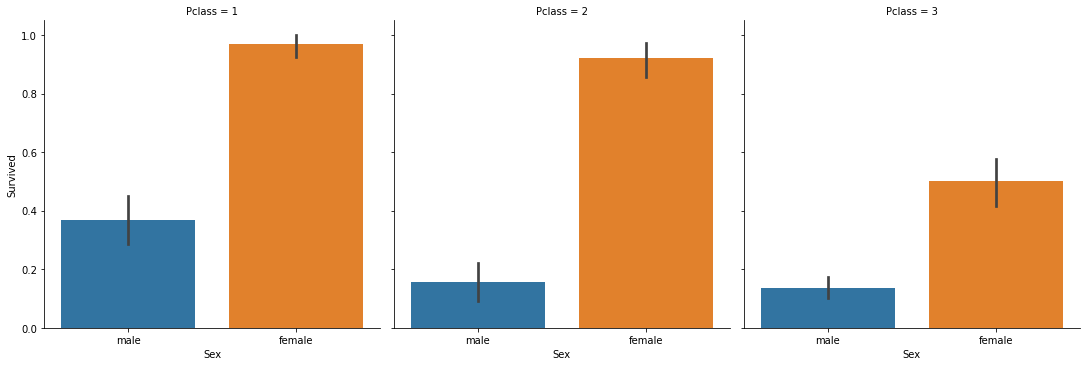

In [9]:
sns.catplot(x='Sex',y='Survived',data=df,kind="bar",col='Pclass');


=> tỷ lệ sống sót giữa Nam và Nữ trên từng hạng vé

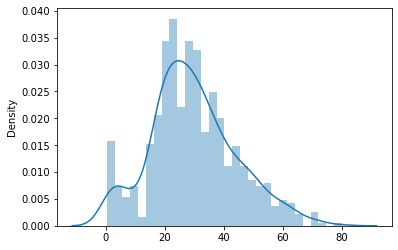

In [10]:
sns.distplot(x=df['Age'], bins= 30);

=> Độ tuổi chủ yếu trên tàu Titanic là từ khoảng 20 đến dưới 40 tuổi.

Số lượng trẻ em dưới 10 tuổi cũng khá nhiều. Tuy nhiên trẻ sơ sinh là nhiều nhất nên ta thấy cột 0 cao nhất trong phần này.

Độ tuổi từ 60 trở đi chiếm 1 phần rất nhỏ trong các hành khách trên tàu Titanic.

In [11]:
# Tỷ lệ sóng sót của trẻ con đi cùng phụ huynh có cao hơn trẻ con không có phụ huynh?
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


=>Col_1: Tuổi trung bình của những người sống sót là 28, vì vậy những người trẻ tuổi có xu hướng sống sót nhiều hơn.

Col_2: Những người trả giá vé cao hơn có nhiều khả năng sống sót hơn, hơn gấp đôi =>Đây có thể là những người đi trên khoang hạng nhất.

Col_3: Nếu bạn có cha mẹ, bạn có cơ hội sống sót cao hơn. 

Col_4: Nếu bạn là một đứa trẻ và có anh chị em, bạn sẽ có ít cơ hội sống sót hơn

In [12]:
# Trung bình phí (Fare) của hành khách phải trả theo từng loại vé (Pclass)?
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [13]:
# Loại vé nào thu lợi nhiều nhất cho tàu Titanic?
df.groupby("Pclass").agg(Fare = ("Fare","sum"))


,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951


# Pre - processing

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


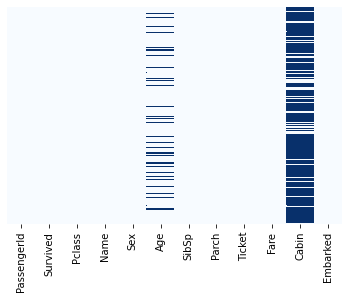

In [15]:
sns.heatmap(df.isna(), cmap="Blues", cbar=False, yticklabels=False);

=> Nhìn vào biểu đồ heatmap ở trên ta thấy như sau:

Có 2 cột: Age, Cabin là có dữ liệu bị null.
Cột Cabin có số dữ liệu null nhiều nhất 

In [16]:
# Cụ thể % missing data của từng feature
for col in df.columns:
    missing_data = df[col].isna().sum()
    percent_missing = missing_data / len(df) *100
    print(f" Columns {col} has : {percent_missing} % missing data ")

 Columns PassengerId has : 0.0 % missing data 
 Columns Survived has : 0.0 % missing data 
 Columns Pclass has : 0.0 % missing data 
 Columns Name has : 0.0 % missing data 
 Columns Sex has : 0.0 % missing data 
 Columns Age has : 19.865319865319865 % missing data 
 Columns SibSp has : 0.0 % missing data 
 Columns Parch has : 0.0 % missing data 
 Columns Ticket has : 0.0 % missing data 
 Columns Fare has : 0.0 % missing data 
 Columns Cabin has : 77.10437710437711 % missing data 
 Columns Embarked has : 0.22446689113355783 % missing data 


In [17]:
# missing data
df.Age = df.Age.fillna(df.Age.median())
df.Cabin=df.Cabin.fillna('NA')
df.Embarked = df.Embarked.fillna("S")

In [18]:
# xử lý dữ liệu categorical 
df.loc[df["Sex"] =="male", "Sex"] = 0
df.loc[df["Sex"] =="female", "Sex"] = 1

df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

In [19]:
# selection features
feature = ['Pclass','Age','Fare','SibSp', 'Parch', 'Sex','Embarked']
X = df[feature].values
y = df["Survived"].values

# Splitting Data into Training and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Modeling

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1, max_depth = 3 )

In [22]:
#Fit data into model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

# Prediction

In [23]:
y_preds = clf.predict(X_test)

In [24]:
pd.DataFrame({"y": y_test, "y_preds": y_preds}).head(10)

,y,y_preds
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


# Evaluation

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_preds))

DecisionTrees's Accuracy:  0.8044692737430168


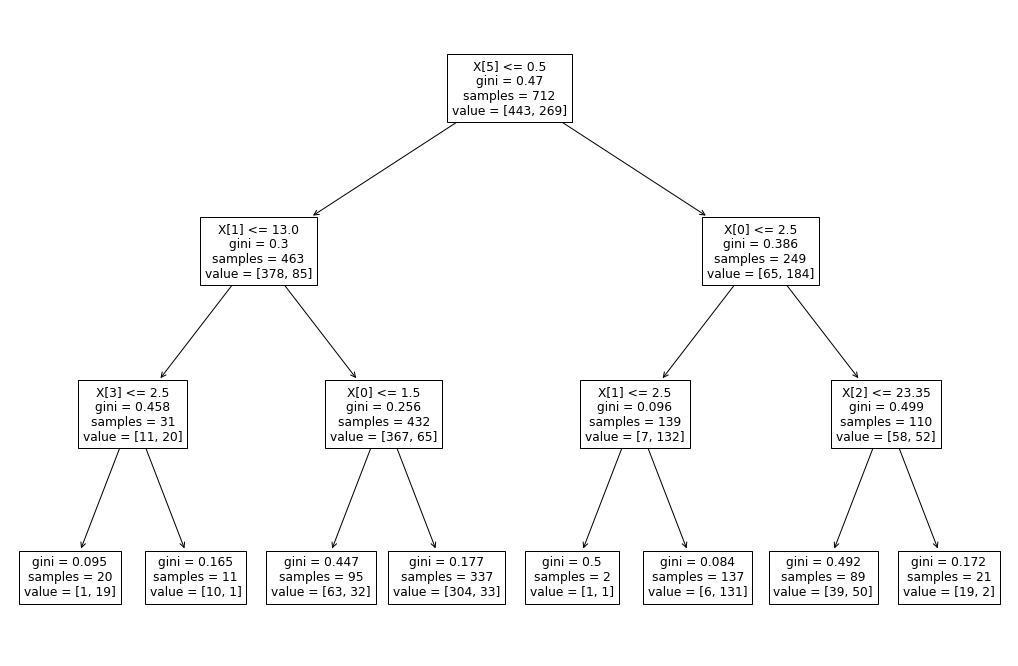

In [26]:
from sklearn import tree
plt.figure(figsize=(18,12))
tree.plot_tree(clf)
plt.show()